In [1]:
import numpy as np
from library_dicom.dicom_processor.tools.create_mip import *
import matplotlib.pyplot as plt
from radiomics.featureextractor import *
from sklearn import mixture

from library_dicom.post_processing.PostProcess_Reader import PostProcess_Reader
from library_dicom.post_processing.Mask4D import Mask4D
from library_dicom.post_processing.GaussianModel import GaussianModel

In [2]:
import SimpleITK as sitk  
mask_path = r'C:\Users\wendy\Documents\STAGE\1.2.124.113532.172.16.25.2.20130717.529.1327224_nifti_mask.nii'
pet_path = r'C:\Users\wendy\Documents\STAGE\1.2.124.113532.172.16.25.2.20130717.529.1327224_nifti_PT.nii'

In [3]:
model = GaussianModel(mask_path, pet_path, type = '4d')

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


In [4]:
parameters = model.gaussien_mixture_model()

In [5]:
parameters[1]

{'best_n_components': 4,
 'best_cv_type': 'full',
 'label': array([3, 3, 3, ..., 0, 0, 0], dtype=int64)}

In [6]:
for i in range(1,11):
    print('key : {}, volume : {}'.format(i, model.features[i]['volume']))

key : 1, volume : 165.504
key : 2, volume : 6.4
key : 3, volume : 21.632
key : 4, volume : 318.336
key : 5, volume : 15.36
key : 6, volume : 22.464000000000002
key : 7, volume : 13.824
key : 8, volume : 785.28
key : 9, volume : 5.824
key : 10, volume : 6.72


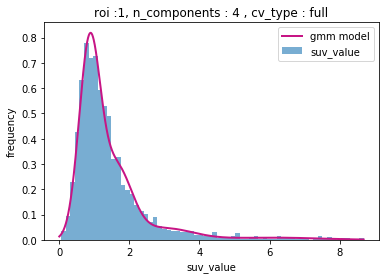

In [7]:
model.get_histogram_best_model(1)

In [8]:
for i in range(1,11):
    print('key : {}, n _components : {}'.format(i, parameters[i]['best_n_components']))

key : 1, n _components : 4
key : 2, n _components : 1
key : 3, n _components : 1
key : 4, n _components : 5
key : 5, n _components : 1
key : 6, n _components : 1
key : 7, n _components : 1
key : 8, n _components : 6
key : 9, n _components : 1
key : 10, n _components : 1


In [9]:
model.number_of_roi_after_model()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22])

In [10]:
cluster = model.new_clusters()

In [11]:
mask = model.new_labelled_mask()

In [12]:
mask.shape

(169, 169, 255)

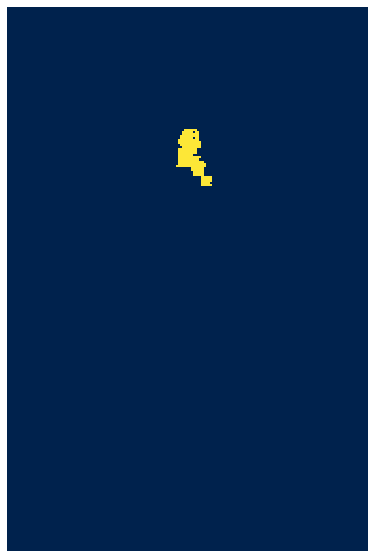

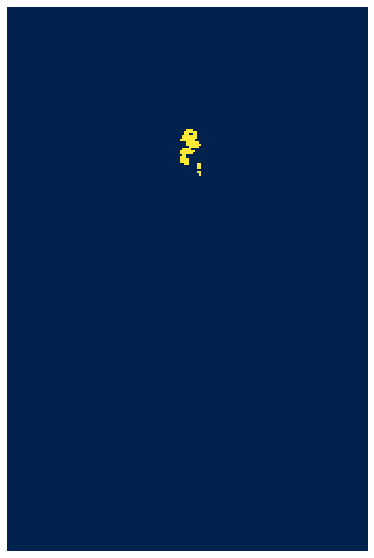

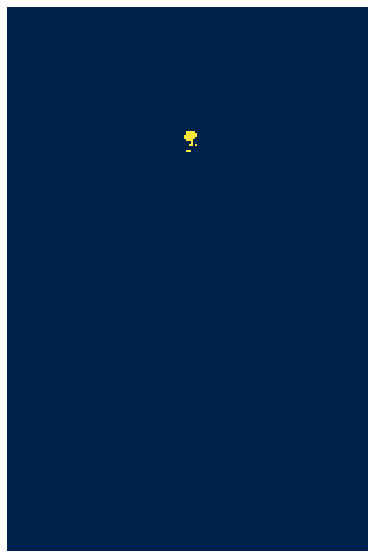

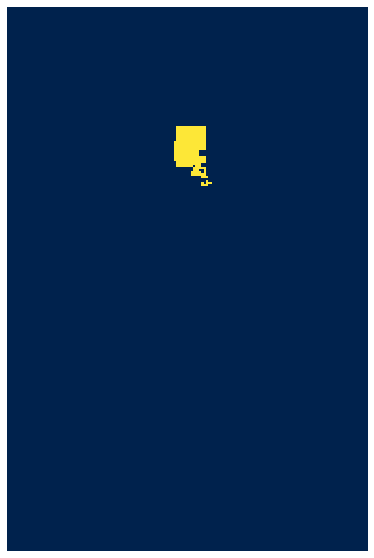

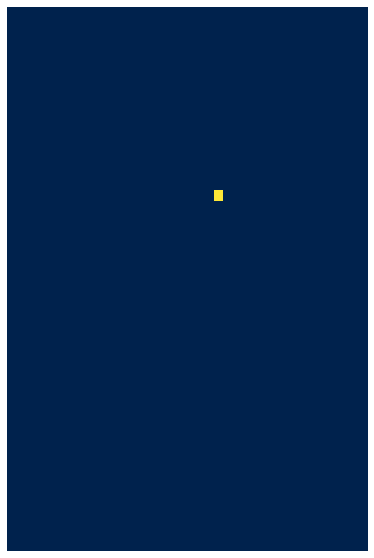

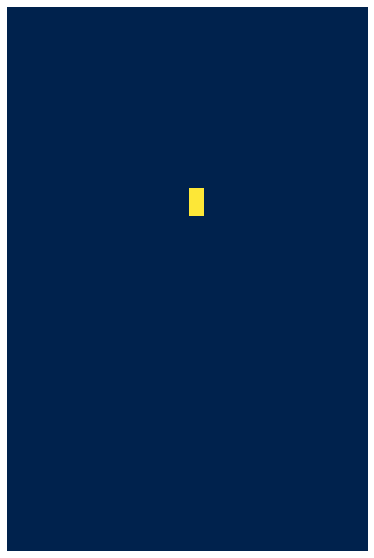

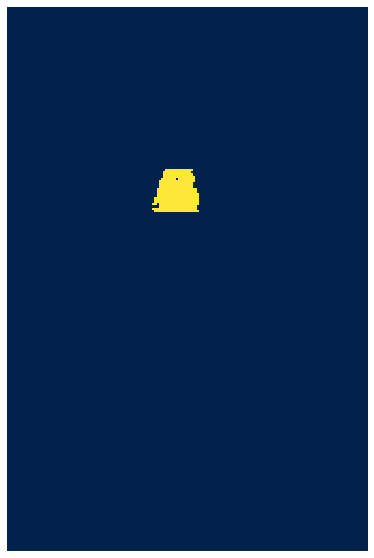

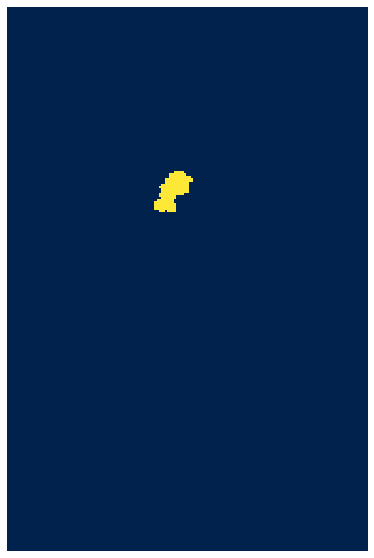

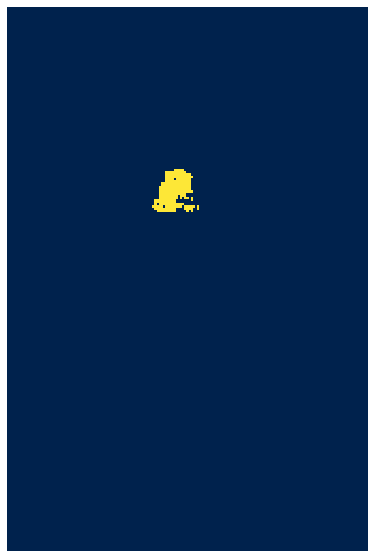

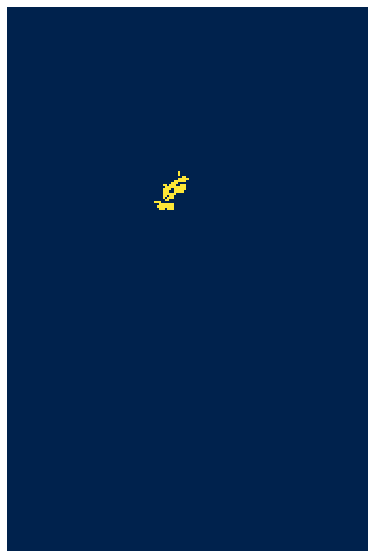

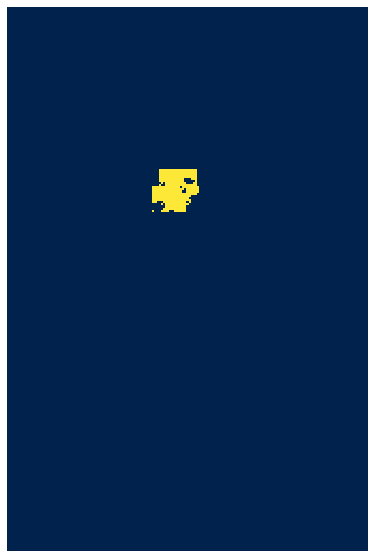

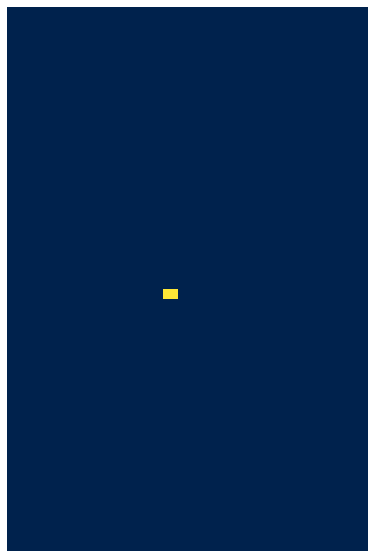

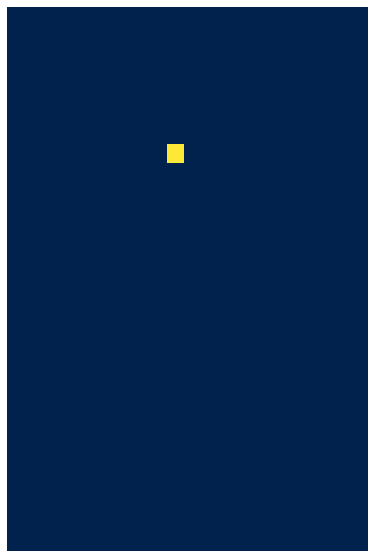

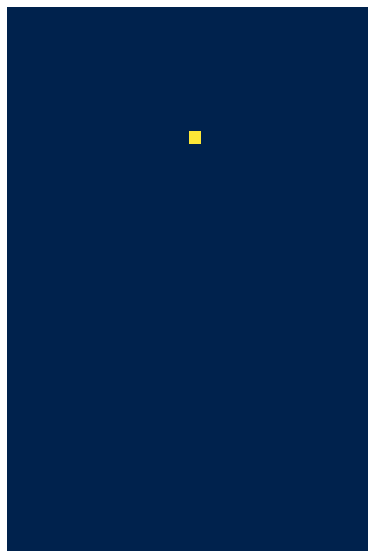

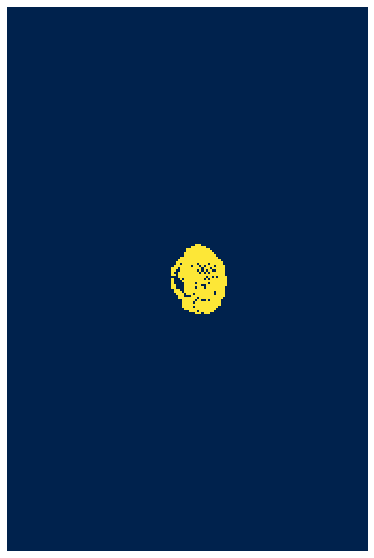

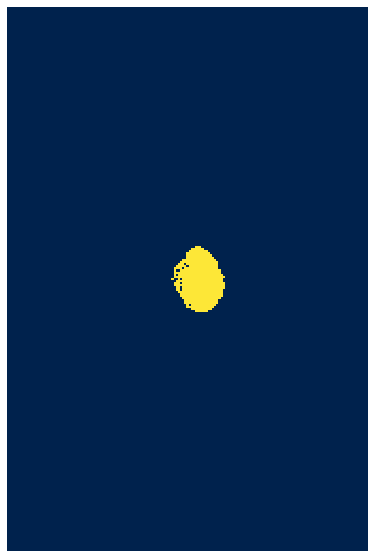

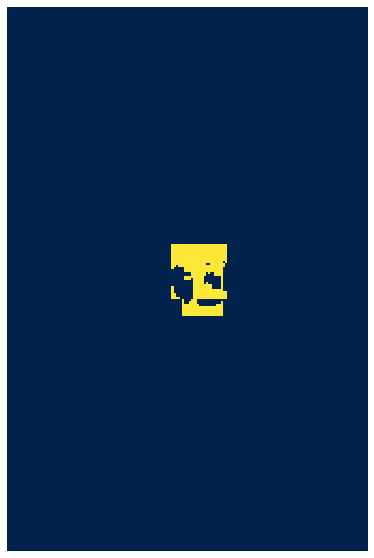

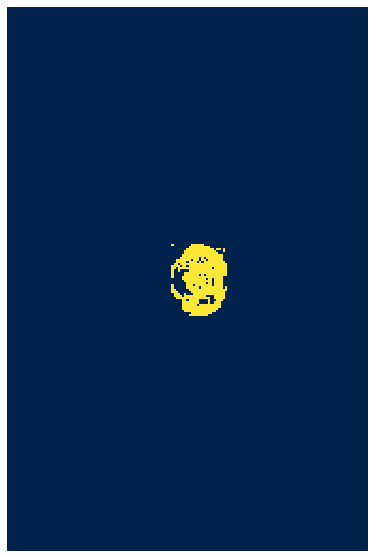

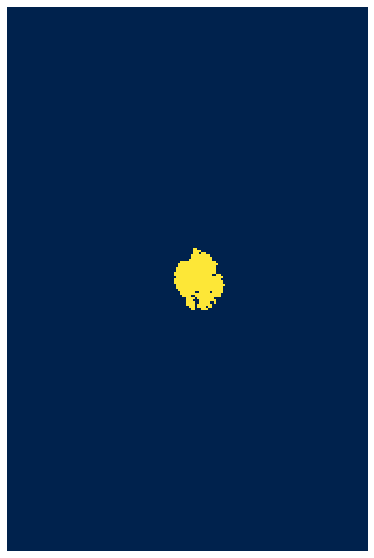

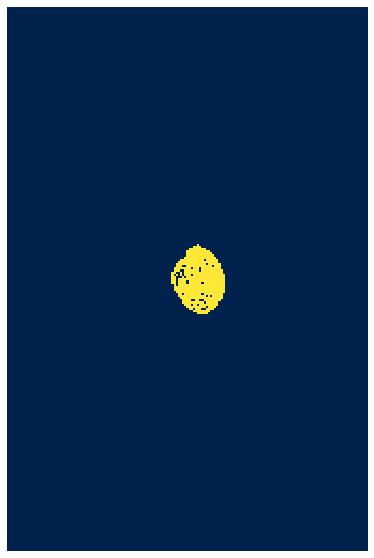

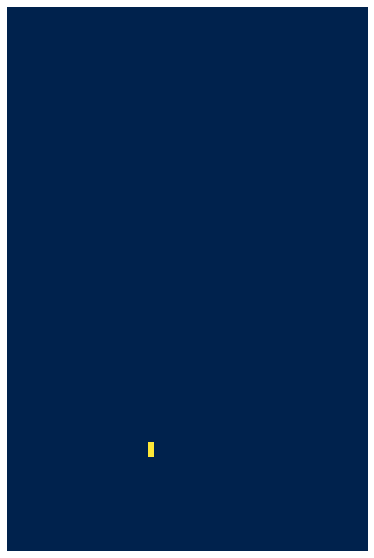

In [13]:
for i in range(1,22) : 
    x,y,z = np.where(mask == i)
    new_mask_3D = np.zeros((169, 169, 255))
    for j in range(len(x)): 

        new_mask_3D[x[j], y[j], z[j]] = 10
    mip_imshow(new_mask_3D, 0)

In [16]:
pet_array = model.pet_array
pet_array[np.where(model.binary_mask == 0)] = 0

In [21]:
x, y, z = np.where(pet_array != 0)

In [22]:
values = []
for i in range(len(x)) : 
    values.append(pet_array[x[i], y[i], z[i]])

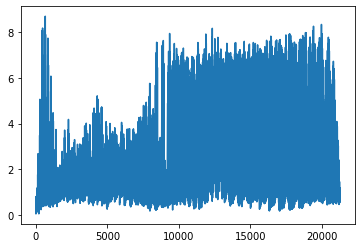

In [23]:
plt.plot(values)

In [21]:
type(features[1]['volume'])

numpy.float64

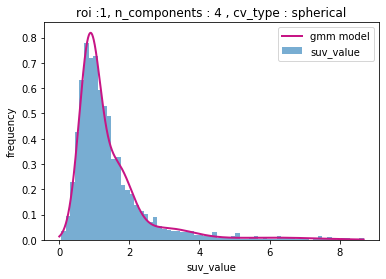

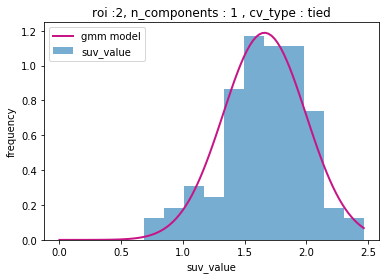

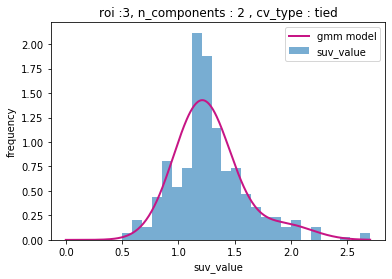

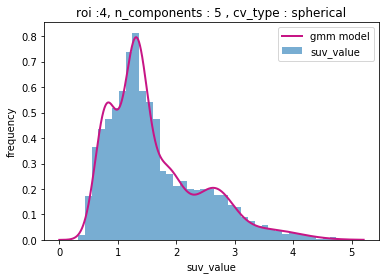

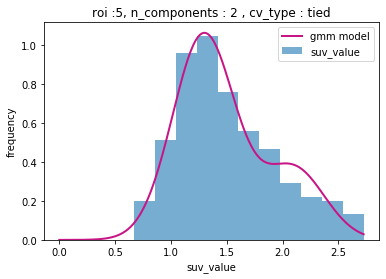

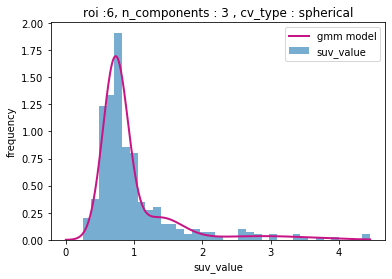

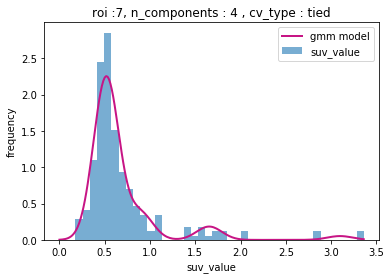

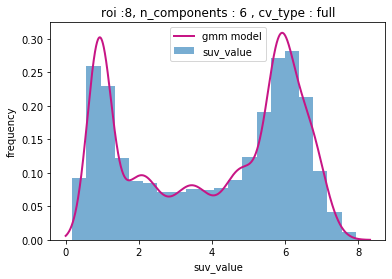

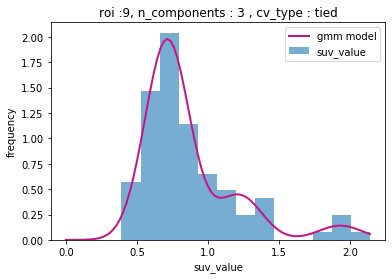

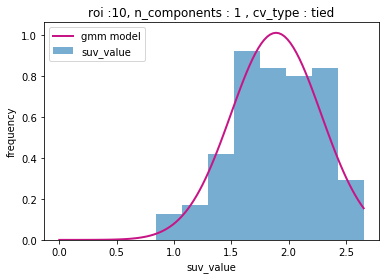

In [9]:
parameters = mask_object.gaussien_mixture_model(features)

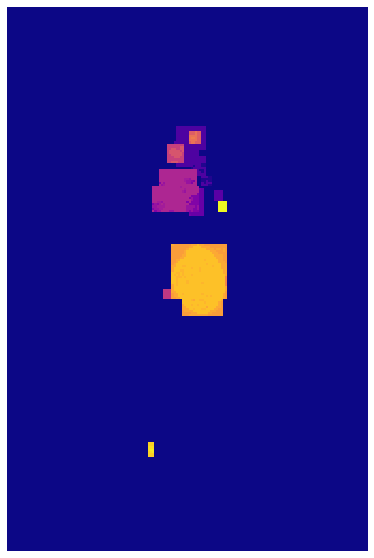

In [15]:
mip_imshow(mask_object.get_new_labelled_mask(parameters, features),0)

In [10]:
for key in range(1, len(dict) + 1) :
    print('key : {} , mean : {}, \ncovariance : {}, \nweights : {} , \nlabel : {}, \nlenght_label : {} , \nlength_X_train : {}'.format(key, parameters[key]['mean'], parameters[key]['covariances'], parameters[key]['weights'], parameters[key]['label'], parameters[key]['number'], parameters[key]['number_X_train'] ))
    print('\n')

key : 1 , mean : [[1.62344726]
 [2.99933915]
 [6.08952706]
 [0.86035366]], 
covariance : [0.19651923 0.64861626 1.83384756 0.09152335], 
weights : [0.30880323 0.09186097 0.0302053  0.5691305 ] , 
label : [3 3 3 ... 0 0 0], 
lenght_label : 2586 , 
length_X_train : (2586, 1)


key : 2 , mean : [[1.660221]], 
covariance : [[0.11263598]], 
weights : [1.] , 
label : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], 
lenght_label : 100 , 
length_X_train : (100, 1)


key : 3 , mean : [[1.211468  ]
 [1.94349144]], 
covariance : [[0.06369722]], 
weights : [0.90189456 0.09810544] , 
label : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0

In [11]:
for key in range(1, len(dict) + 1) : 
    print('key : {} , median : {} , sd : {}'.format(key, dict[key]['median'], dict[key]['standart_deviation']))
    print('\n')

key : 1 , median : 1.1369165864763804 , sd : 1.1426276601294223


key : 2 , median : 1.6910289290965719 , sd : 0.3356113557657893


key : 3 , median : 1.2445112161113692 , sd : 0.33333071684762455


key : 4 , median : 1.4023166729093524 , sd : 0.8024812803095284


key : 5 , median : 1.414869379700101 , sd : 0.4483014485343511


key : 6 , median : 0.7854407963354173 , sd : 0.6305107394813119


key : 7 , median : 0.5487326111384423 , sd : 0.4646839176100584


key : 8 , median : 4.626569074304514 , sd : 2.257869214827408


key : 9 , median : 0.7639218704084196 , sd : 0.35541303016328746


key : 10 , median : 1.8972519692303005 , sd : 0.39420376487241116




In [41]:
from sklearn.cluster import KMeans

X = np.asarray(dict[6]['suv_values']).reshape((-1,1))

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)



In [42]:
kmeans.cluster_centers_

array([[0.72687449],
       [3.15949637],
       [1.50468887]])

In [15]:
extractor = RadiomicsFeatureExtractor()

extractor.execute(pt, mask_img, label = 2) # = results

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


OrderedDict([('diagnostics_Versions_PyRadiomics', 'v3.0'),
             ('diagnostics_Versions_Numpy', '1.16.5'),
             ('diagnostics_Versions_SimpleITK', '1.2.3'),
             ('diagnostics_Versions_PyWavelet', '1.0.0'),
             ('diagnostics_Versions_Python', '3.7.4'),
             ('diagnostics_Configuration_Settings',
              {'minimumROIDimensions': 2,
               'minimumROISize': None,
               'normalize': False,
               'normalizeScale': 1,
               'removeOutliers': None,
               'resampledPixelSpacing': None,
               'interpolator': 'sitkBSpline',
               'preCrop': False,
               'padDistance': 5,
               'distances': [1],
               'force2D': False,
               'force2Ddimension': 0,
               'resegmentRange': None,
               'label': 2,
               'additionalInfo': True}),
             ('diagnostics_Configuration_EnabledImageTypes', {'Original': {}}),
             ('diagnost

In [35]:
type(results['original_shape_VoxelVolume'])

numpy.float64